# **INFERENCE DEMO** for Optimizing Methane Detection Onboard Satellites: Speed, Accuracy, and Low-Power Solutions for Resource-Constrained Hardware

Paper: ___

Conference: ___

Link: ___

Authors: ___

Note: Make sure to use GPU backend on Google Colab with these.


## Step 1. Install required libraries and get code

Note: For model inference, we use the codebase and environment of HyperspectralViTs

In [1]:
!git clone https://github.com/previtus/HyperspectralViTs.git

Cloning into 'HyperspectralViTs'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 75 (delta 13), reused 67 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 202.26 KiB | 1.02 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [2]:
!pip install git+https://github.com/previtus/HyperspectralViTs.git
# remember to restart session after this

  Cloning https://github.com/previtus/HyperspectralViTs.git to /tmp/pip-req-build-mt7ttj9j
  Running command git clone --filter=blob:none --quiet https://github.com/previtus/HyperspectralViTs.git /tmp/pip-req-build-mt7ttj9j
  Resolved https://github.com/previtus/HyperspectralViTs.git to commit a184a2556430fe7cb3af57558e64817569c8d258
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with ot

In [1]:
# Further update these libraries ... this is specific for the current Colab environment (as of May 2025)
!pip install torchmetrics==1.7.1 pytorch_lightning==2.2 torch==2.7.0
# If you are asked, restart the session

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 847.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

### (optional) Check these imports

If we get any errors here with these imports, the main code will likely also fail. If that happens try installing other older/newer library versions and check for compatability issues.

In [2]:
from torchmetrics import functional
import pytorch_lightning as pl
print(pl.__version__)
import torch
print(torch.__version__)

/usr/local/lib/python3.11/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.11/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


2.2.0
2.7.0+cu126


In [3]:
%cd /content/HyperspectralViTs/
!python -m scripts.train --help
# ^ this will be quite verbose

/content/HyperspectralViTs
/usr/local/lib/python3.11/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.11/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/content/HyperspectralViTs/hyper/models/efficientvit_building_blocks.py:966: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled=False)
train is powered by Hydra.

== Configuration groups ==
Compose your configuration from those groups (group=option)



== Config ==
Override anything in the config (foo.bar=value)

experiment_name: HyperspectralViT_run
experiment_path: ''
seed: None
resum

## Step 2. Download model weights and get example data

Here we present two checkpoints of models trained using RGB and the **Mag1c-SAS** product (in each event folder present in the "*mag1c_tile_sampled-0.01.tif*" geotiff file).

In [4]:
# MODELS
%cd /content/

"""
  UNet_RGB_tileMag1c_1perc_R1.zip
  https://drive.google.com/file/d/13ljTZx1zm76wa7Z7z6HXFSsWkCpJ1YyI/view?usp=drive_link
  LinkNet_RGB_tileMag1c_1perc_R3.zip
  https://drive.google.com/file/d/1pK5oWHE5e3sLsIofT0Lu4g6ZsUL3xvNB/view?usp=drive_link
"""
!gdown 13ljTZx1zm76wa7Z7z6HXFSsWkCpJ1YyI
!unzip UNet_RGB_tileMag1c_1perc_R1.zip
!rm UNet_RGB_tileMag1c_1perc_R1.zip

!gdown 1pK5oWHE5e3sLsIofT0Lu4g6ZsUL3xvNB
!unzip LinkNet_RGB_tileMag1c_1perc_R3.zip
!rm LinkNet_RGB_tileMag1c_1perc_R3.zip


/content
Downloading...
From (original): https://drive.google.com/uc?id=13ljTZx1zm76wa7Z7z6HXFSsWkCpJ1YyI
From (redirected): https://drive.google.com/uc?id=13ljTZx1zm76wa7Z7z6HXFSsWkCpJ1YyI&confirm=t&uuid=4634c627-2bf2-4730-a178-3cf34a154820
To: /content/UNet_RGB_tileMag1c_1perc_R1.zip
100% 97.1M/97.1M [00:02<00:00, 38.3MB/s]
Archive:  UNet_RGB_tileMag1c_1perc_R1.zip
   creating: UNet_RGB_tileMag1c_1perc_R1/
  inflating: UNet_RGB_tileMag1c_1perc_R1/final_checkpoint_model_40ep.ckpt  
  inflating: UNet_RGB_tileMag1c_1perc_R1/final_checkpoint_model_40ep.onnx  
  inflating: UNet_RGB_tileMag1c_1perc_R1/results_test_40ep.json  
  inflating: UNet_RGB_tileMag1c_1perc_R1/train.log  
Downloading...
From: https://drive.google.com/uc?id=1pK5oWHE5e3sLsIofT0Lu4g6ZsUL3xvNB
To: /content/LinkNet_RGB_tileMag1c_1perc_R3.zip
100% 12.8M/12.8M [00:00<00:00, 36.0MB/s]
Archive:  LinkNet_RGB_tileMag1c_1perc_R3.zip
   creating: LinkNet_RGB_tileMag1c_1perc_R3/
  inflating: LinkNet_RGB_tileMag1c_1perc_R3/results_

In [5]:
# DATA - mini dataset:
%cd /content/
!gdown 17A7z3MiR-RvPT7Sf_-lfdpEAqnsS2Zvj
!unzip STARCOP_mini_fast_products.zip
!rm STARCOP_mini_fast_products.zip

/content
Downloading...
From (original): https://drive.google.com/uc?id=17A7z3MiR-RvPT7Sf_-lfdpEAqnsS2Zvj
From (redirected): https://drive.google.com/uc?id=17A7z3MiR-RvPT7Sf_-lfdpEAqnsS2Zvj&confirm=t&uuid=7b8dd5b2-7da6-4dd7-9695-2dfd409d8d2c
To: /content/STARCOP_mini_fast_products.zip
100% 101M/101M [00:00<00:00, 113MB/s]
Archive:  STARCOP_mini_fast_products.zip
   creating: STARCOP_mini_fast_products/
   creating: STARCOP_mini_fast_products/ang20190923t174142_r5826_c168_w151_h151/
  inflating: STARCOP_mini_fast_products/ang20190923t174142_r5826_c168_w151_h151/weight_mag1c.tif  
  inflating: STARCOP_mini_fast_products/ang20190923t174142_r5826_c168_w151_h151/TOA_AVIRIS_460nm.tif  
  inflating: STARCOP_mini_fast_products/ang20190923t174142_r5826_c168_w151_h151/TOA_AVIRIS_550nm.tif  
  inflating: STARCOP_mini_fast_products/ang20190923t174142_r5826_c168_w151_h151/TOA_AVIRIS_640nm.tif  
  inflating: STARCOP_mini_fast_products/ang20190923t174142_r5826_c168_w151_h151/valid_mask.tif  
  inflat

In [7]:
!ls /content/STARCOP_mini_fast_products

ang20190923t174142_r5826_c168_w151_h151
ang20190924t183641_r14137_c154_w151_h151
ang20191005t210402_r9366_c472_w151_h151
ang20191005t221554_r5023_c432_w151_h151
ang20191008t151045_r5097_c477_w151_h151
ang20191010t155034_r16931_c325_w151_h151
ang20191011t165345_r4367_c196_w151_h151
ang20191011t165345_r5135_c169_w151_h151
ang20191011t174241_r4837_c234_w151_h151
ang20191018t141549_r3900_c244_w151_h151
ang20191018t144405_r2674_c436_w151_h151
ang20191018t163108_r14851_c525_w151_h151
ang20191018t165503_r2660_c460_w151_h151
ang20191018t181457_r4349_c389_w151_h151
ang20191018t190719_r1941_c33_w151_h151
ang20191018t190719_r2696_c420_w151_h151
ang20191021t191828_r4300_c359_w151_h151
ang20191025t165545_r6573_c24_w151_h151
test_mini10.csv
train_mini10.csv
train_mini10_tiled_128_64.csv


In [8]:
# Also download pre-computed data normalisations
%cd /content/
!gdown 15V1w4oEqx24Mittw31FI9rKG3QO0gOKy
!mkdir /content/feature_folder
%cd /content/feature_folder
!unzip ../normaliser_features_fastprods.zip

/content
Downloading...
From: https://drive.google.com/uc?id=15V1w4oEqx24Mittw31FI9rKG3QO0gOKy
To: /content/normaliser_features_fastprods.zip
100% 1.68k/1.68k [00:00<00:00, 9.32MB/s]
/content/feature_folder
Archive:  ../normaliser_features_fastprods.zip
  inflating: normaliser_fastprods_rgb_ace.npy  
  inflating: normaliser_fastprods_rgb_cem.npy  
  inflating: normaliser_fastprods_rgb_mag1c_1perc.npy  
  inflating: normaliser_fastprods_rgb_mag1c_wholetile.npy  
  inflating: normaliser_fastprods_rgb_mf.npy  


In [9]:
!ls /content/feature_folder/

normaliser_fastprods_rgb_ace.npy
normaliser_fastprods_rgb_cem.npy
normaliser_fastprods_rgb_mag1c_1perc.npy
normaliser_fastprods_rgb_mag1c_wholetile.npy
normaliser_fastprods_rgb_mf.npy


In [10]:
ls /content/LinkNet_RGB_tileMag1c_1perc_R3

final_checkpoint_model_40ep.ckpt  results_test_40ep.json
final_checkpoint_model_40ep.onnx  train.log


## Step 3. Run model inference and save prediction visualisations

### a.) LinkNet model with RGB + Mag1c-SAS (tile-wise)

In [11]:
%cd /content/HyperspectralViTs/

# This runs our model evaluation script which also saves visualisations of the predictions
!TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD=1 python -m scripts.evaluate dataset.input_products.specific_products=[640,550,460,"mag1c_tile_sampled-0.01"] \
          wandb.wandb_project="FastProds_InferenceDemos" \
          model.architecture="linknet" \
          model.hyperstarcop.backbone="timm-mobilenetv3_small_minimal_100" \
          model.positive_weight=1 experiment_name="inference_demo_LinkNet_RGB_tileMag1c_1perc_R3" \
          dataset.augment_rotation_load_surrounding_area=0.4 \
          dataset.normalisation.mode_input="from_data" \
          dataset.normalisation.save_load_from="normaliser_fastprods_rgb_mag1c_1perc" \
          dataset.normalisation.max_style="max_outliers" dataset.normalisation.max_outlier_percentile=5 \
          dataloader.num_workers=8 dataloader.train_batch_size=32 dataloader.val_batch_size=32  \
          training.val_check_interval=0.5 training.max_epochs=40 \
          dataset.format="AVIRIS" model.multiply_loss_by_mag1c=True model.weighted_random_sampler=True \
          training.visualiser.bands=['rgb','labelbinary','prediction','differences'] \
          dataset.train_csv="train_mini10.csv" dataset.test_csv="test_mini10.csv" \
          dataset.root_folder="/content/STARCOP_mini_fast_products" \
          dataset.feature_folder="/content/feature_folder" \
          dataset.tiler.tile_size=128 dataset.tiler.tile_overlap=64 \
          model.load_path="/content/LinkNet_RGB_tileMag1c_1perc_R3/final_checkpoint_model_40ep.ckpt" \
          evaluation.plot_save=True evaluation.plot_show=True

# Note, you can adjust items in the training.visualiser.bands argument to change which products will be visualised
# Note: explanation on TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD is at https://github.com/Lightning-AI/pytorch-lightning/issues/20058


/content/HyperspectralViTs
/usr/local/lib/python3.11/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.11/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/content/HyperspectralViTs/hyper/models/efficientvit_building_blocks.py:966: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled=False)
Creating train dataset
This is train dataset, will set the normalisation params
searching for normalisation file in: /content/feature_folder/normaliser_fastprods_rgb_mag1c_1perc.npy found? True
loaded computed statistics from /content/feature_folder/norm

Please note that these results are only the scores for the mini dataset - for comparison with the paper, you'll need to use the full datasets.

In [13]:
# Visualisations are saved here:
!ls experiments/inference_demo_LinkNet_RGB_tileMag1c_1perc_R3/plots_test

plot__id_ang20191018t141549_r3900_c244_w151_h151_batch_002.png
plot__id_ang20191018t144405_r2674_c436_w151_h151_batch_000.png
plot__id_ang20191018t163108_r14851_c525_w151_h151_batch_001.png
plot__id_ang20191018t165503_r2660_c460_w151_h151_batch_007.png
plot__id_ang20191018t181457_r4349_c389_w151_h151_batch_006.png
plot__id_ang20191018t190719_r1941_c33_w151_h151_batch_008.png
plot__id_ang20191018t190719_r2696_c420_w151_h151_batch_004.png
plot__id_ang20191021t191828_r4300_c359_w151_h151_batch_005.png
plot__id_ang20191025t165545_r6573_c24_w151_h151_batch_003.png


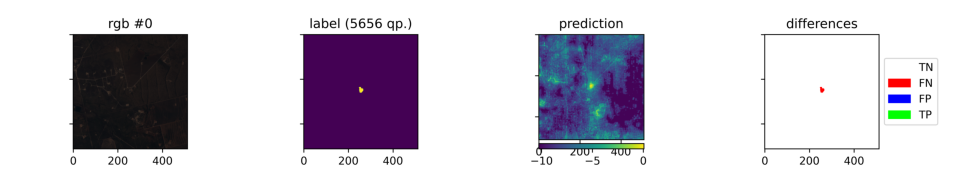

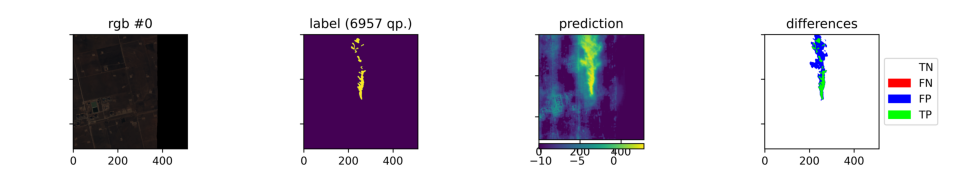

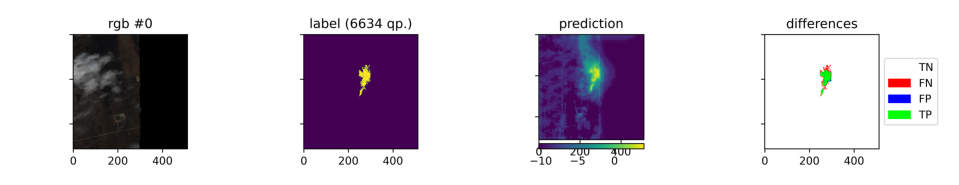

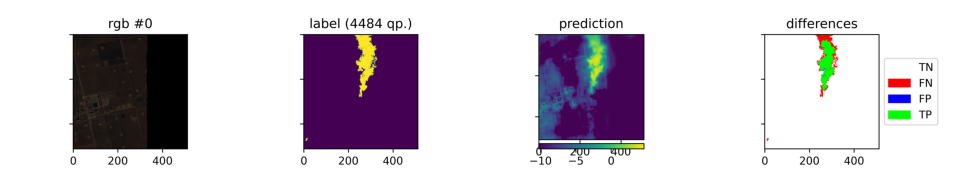

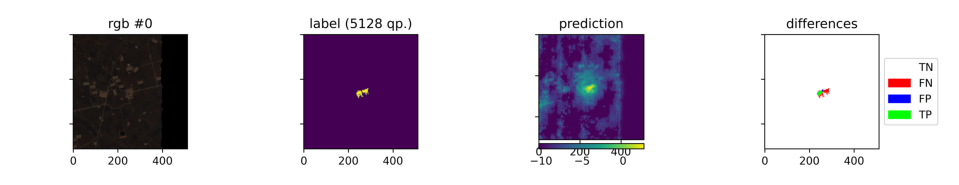

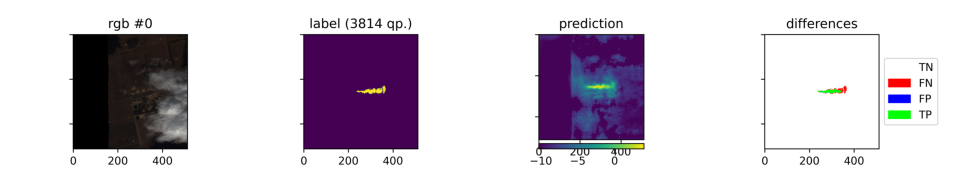

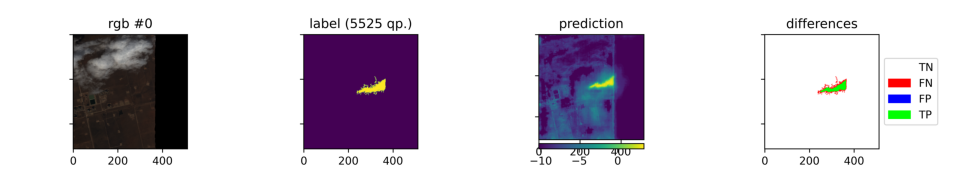

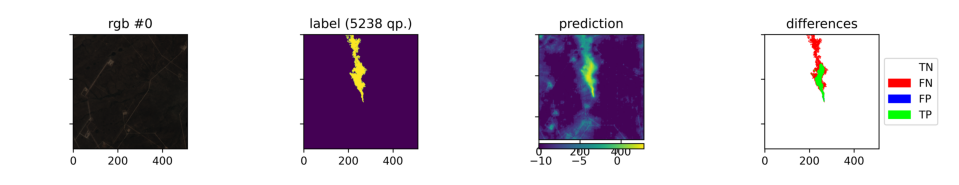

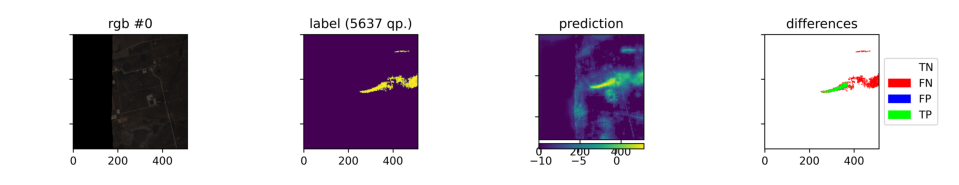

In [14]:
# Simple script to show previews of these in Colab
import matplotlib.pyplot as plt
import os, glob
plot_folder = "experiments/inference_demo_LinkNet_RGB_tileMag1c_1perc_R3/plots_test"
all_plots = sorted(glob.glob(os.path.join(plot_folder, "*.png")))

for plot_path in all_plots:
    plt.figure(figsize=(8, 6), dpi=150)
    img = plt.imread(plot_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Note that the RGB values are normalised according to extremes of the data (min-max without outliers),
#      in the visualisation we show this directly which leads to darker plots
# To show the RGBs without automatic normalisation you can use:
#      dataset.normalisation.mode_input="from_data" training.visualiser.bands=['rgb']
#      but note that it will break the model's predictions (as they were trained with the "from_data" infered values)

### b.) U-Net model with RGB + Mag1c-SAS (tile-wise)

In [15]:
%cd /content/HyperspectralViTs/

!TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD=1 python -m scripts.evaluate dataset.input_products.specific_products=[640,550,460,"mag1c_tile_sampled-0.01"] \
          wandb.wandb_project="FastProds_InferenceDemos" \
          model.architecture="unet" \
          model.positive_weight=1 experiment_name="inference_demo_UNet_RGB_tileMag1c_1perc_R1" \
          dataset.augment_rotation_load_surrounding_area=0.4 \
          dataset.normalisation.mode_input="from_data" dataset.normalisation.save_load_from="normaliser_fastprods_rgb_mag1c_1perc" \
          dataset.normalisation.max_style="max_outliers" dataset.normalisation.max_outlier_percentile=5 \
          dataloader.num_workers=8 dataloader.train_batch_size=32 dataloader.val_batch_size=32  \
          training.val_check_interval=0.5 training.max_epochs=40 \
          dataset.format="AVIRIS" model.multiply_loss_by_mag1c=True model.weighted_random_sampler=True \
          training.visualiser.bands=['rgb','labelbinary','prediction','differences'] \
          dataset.train_csv="train_mini10.csv" dataset.test_csv="test_mini10.csv" \
          dataset.root_folder="/content/STARCOP_mini_fast_products" \
          dataset.feature_folder="/content/feature_folder" \
          dataset.tiler.tile_size=128 dataset.tiler.tile_overlap=64 \
          model.load_path="/content/UNet_RGB_tileMag1c_1perc_R1/final_checkpoint_model_40ep.ckpt" \
          evaluation.plot_save=True evaluation.plot_show=True


/content/HyperspectralViTs
/usr/local/lib/python3.11/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.11/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/content/HyperspectralViTs/hyper/models/efficientvit_building_blocks.py:966: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @autocast(enabled=False)
Creating train dataset
This is train dataset, will set the normalisation params
searching for normalisation file in: /content/feature_folder/normaliser_fastprods_rgb_mag1c_1perc.npy found? True
loaded computed statistics from /content/feature_folder/norm

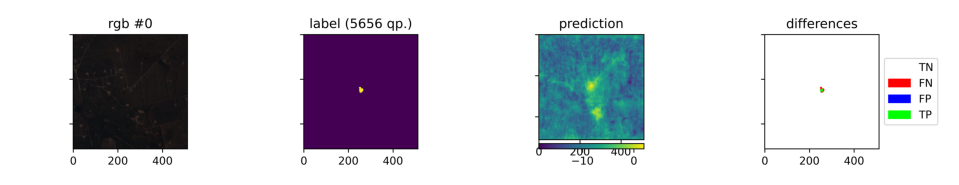

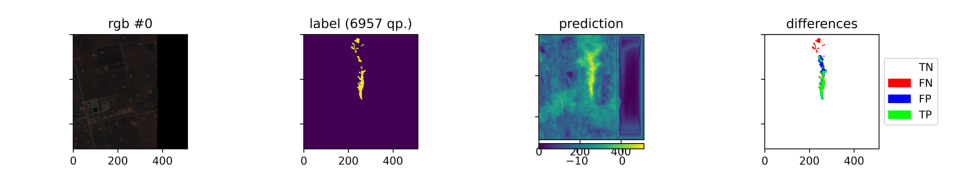

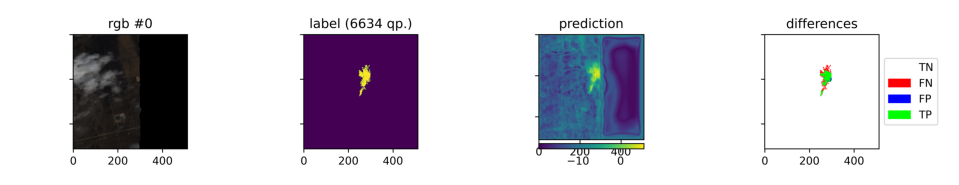

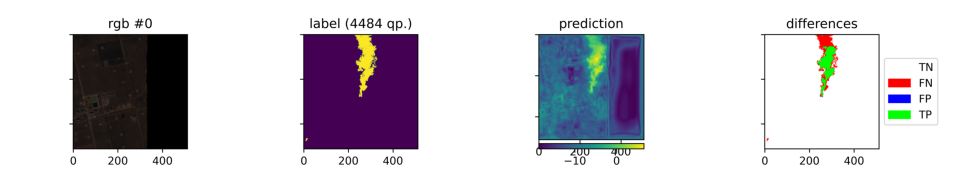

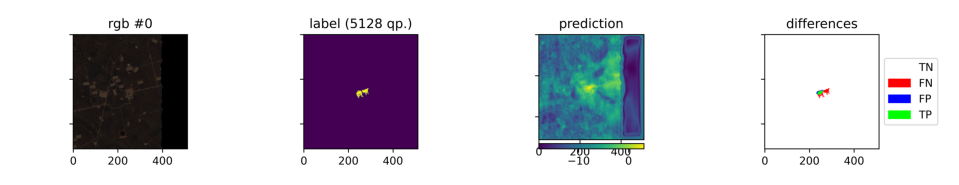

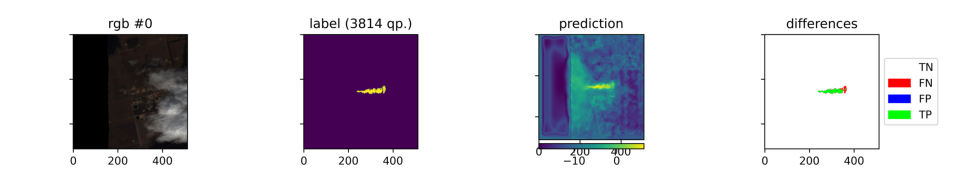

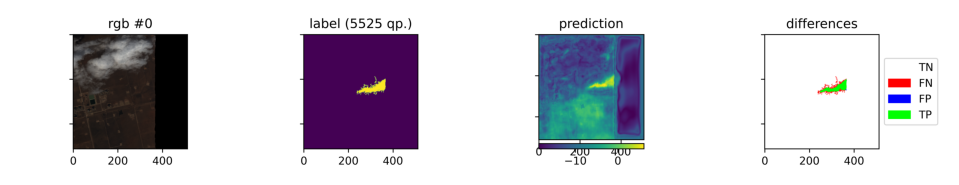

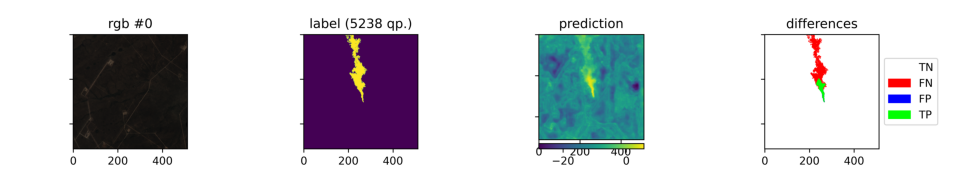

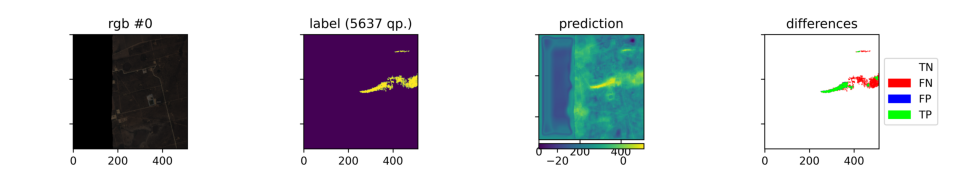

In [17]:
# Simple script to show previews of these in Colab
import matplotlib.pyplot as plt
import os, glob
plot_folder = "experiments/inference_demo_UNet_RGB_tileMag1c_1perc_R1/plots_test"
all_plots = sorted(glob.glob(os.path.join(plot_folder, "*.png")))

for plot_path in all_plots: # [:2]
    plt.figure(figsize=(8, 6), dpi=150)
    img = plt.imread(plot_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()